# SAP Challenge Notebook


## Imports

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from kats.consts import TimeSeriesData

## Load Data Set

,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,...,city_id,product_length,product_depth,product_width,cluster_id,hierarchy1_id,hierarchy2_id,hierarchy3_id,hierarchy4_id,hierarchy5_id
0,P0001,S0002,2017-01-02,0.0,0.00,8.0,6.25,PR14,NaN,PR03,...,C007,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
1,P0001,S0012,2017-01-02,1.0,5.30,0.0,6.25,PR14,NaN,PR03,...,C005,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
2,P0001,S0013,2017-01-02,2.0,10.59,0.0,6.25,PR14,NaN,PR03,...,C026,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
3,P0001,S0023,2017-01-02,0.0,0.00,6.0,6.25,PR14,NaN,PR03,...,C008,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
4,P0001,S0025,2017-01-02,0.0,0.00,1.0,6.25,PR14,NaN,PR03,...,C024,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19454833,P0748,S0125,2019-12-29,NaN,NaN,NaN,18.90,PR14,NaN,PR03,...,C022,3.8,4.8,15.3,cluster_0,H01,H0108,H010801,H01080110,H0108011006
19454834,P0748,S0126,2019-12-29,NaN,NaN,NaN,18.90,PR14,NaN,PR03,...,C014,3.8,4.8,15.3,cluster_0,H01,H0108,H010801,H01080110,H0108011006
19454835,P0748,S0131,2019-12-29,NaN,NaN,NaN,18.90,PR14,NaN,PR03,...,C012,3.8,4.8,15.3,cluster_0,H01,H0108,H010801,H01080110,H0108011006
19454836,P0748,S0132,2019-12-29,NaN,NaN,NaN,18.90,PR14,NaN,PR03,...,C011,3.8,4.8,15.3,cluster_0,H01,H0108,H010801,H01080110,H0108011006


,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,...,city_id,product_length,product_depth,product_width,cluster_id,hierarchy1_id,hierarchy2_id,hierarchy3_id,hierarchy4_id,hierarchy5_id
0,P0001,S0002,2017-01-02,0.0,0.00,8.0,6.25,PR14,NaN,PR03,...,C007,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
1,P0001,S0012,2017-01-02,1.0,5.30,0.0,6.25,PR14,NaN,PR03,...,C005,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
2,P0001,S0013,2017-01-02,2.0,10.59,0.0,6.25,PR14,NaN,PR03,...,C026,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
3,P0001,S0023,2017-01-02,0.0,0.00,6.0,6.25,PR14,NaN,PR03,...,C008,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
4,P0001,S0025,2017-01-02,0.0,0.00,1.0,6.25,PR14,NaN,PR03,...,C024,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19454833,P0748,S0125,2019-12-29,NaN,NaN,NaN,18.90,PR14,NaN,PR03,...,C022,3.8,4.8,15.3,cluster_0,H01,H0108,H010801,H01080110,H0108011006
19454834,P0748,S0126,2019-12-29,NaN,NaN,NaN,18.90,PR14,NaN,PR03,...,C014,3.8,4.8,15.3,cluster_0,H01,H0108,H010801,H01080110,H0108011006
19454835,P0748,S0131,2019-12-29,NaN,NaN,NaN,18.90,PR14,NaN,PR03,...,C012,3.8,4.8,15.3,cluster_0,H01,H0108,H010801,H01080110,H0108011006
19454836,P0748,S0132,2019-12-29,NaN,NaN,NaN,18.90,PR14,NaN,PR03,...,C011,3.8,4.8,15.3,cluster_0,H01,H0108,H010801,H01080110,H0108011006


,time,value
0,2017-01-02,6817.962
1,2017-01-03,6578.220
2,2017-01-04,6615.686
3,2017-01-05,6440.778
4,2017-01-06,7182.927
...,...,...
1087,2019-12-25,0.000
1088,2019-12-26,0.000
1089,2019-12-27,0.000
1090,2019-12-28,0.000


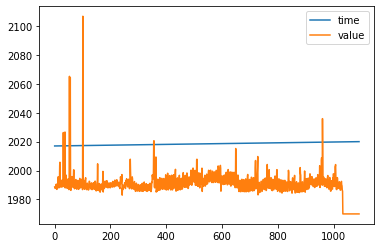

In [3]:
df_stores = pd.read_csv('../dataset/turkish_retail_data/store_cities.csv',
                        delimiter=',',
                        dtype={'store_id': 'category',
                               'storetype_id': 'category',
                               'city_id': 'category'})
df_sales = pd.read_csv('../dataset/turkish_retail_data/sales.csv',
                       delimiter=',',
                       dtype={"product_id": "category",
                              "store_id": "category",
                              "promo_type_1": "category",
                              "promo_bin_1": "category",
                              "promo_type_2": "category",
                              "promo_bin_2": "category",
                              "promo_discount_2": "category",
                              "promo_discount_type_2": "category"},
                       parse_dates=["date"])
df_product_hierachy = pd.read_csv('../dataset/turkish_retail_data/product_hierarchy.csv',
                                  delimiter=',',
                                  dtype={'product_id': 'category',
                                         'cluster_id': 'category',
                                         'hierarchy1_id': 'category',
                                         'hierarchy2_id': 'category',
                                         'hierarchy3_id': 'category',
                                         'hierarchy4_id': 'category',
                                         'hierarchy5_id': 'category'})

df_sales = df_sales.join(df_stores.set_index('store_id'), on='store_id')
df_sales = df_sales.join(df_product_hierachy.set_index('product_id'), on='product_id')

display(df_sales)

ts_global_sales = df_sales.groupby(by=['date'])['sales'].sum().reset_index()

display(df_sales)

ts_global_sales = ts_global_sales.rename(columns={'date': 'time', 'sales': 'value'})

ts_global_sales.plot()
display(ts_global_sales)
plt.show()

## Transform into time series

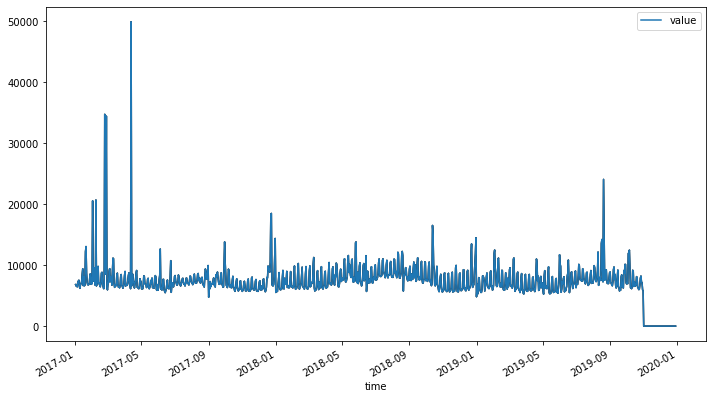

In [4]:
ts_global_sales = TimeSeriesData(time=ts_global_sales.time, value=ts_global_sales.value)
ts_global_sales.plot(cols=['value'])
plt.show()

In [5]:
## Predict future results

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -7.55202
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2753.24   0.000757996       159.219      0.5802      0.5802      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2756.43   0.000458349       137.399     0.02596           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2757.76    0.00061769       131.686      0.1755           1      357   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     394       2758.81   7.35294e-05       67.5304   1.236e-06       0.001      503  LS failed, Hessian reset 
     399       2758.81   2.72693e-05       55.0592           1           1      509   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     431       2758.82   1.98736e-06    

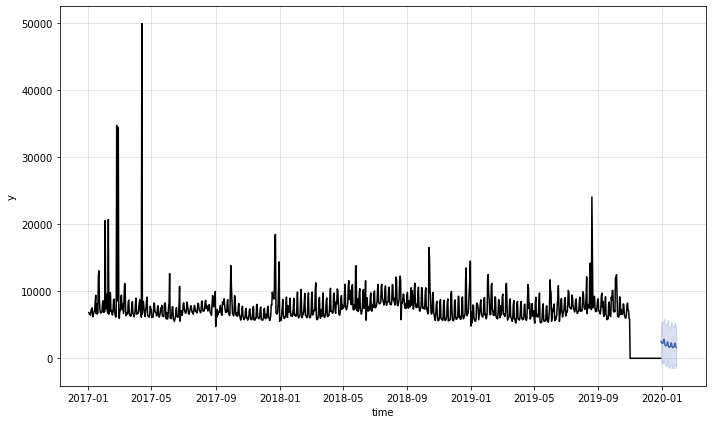

In [6]:
from kats.models.prophet import ProphetModel, ProphetParams

params = ProphetParams(seasonality_mode='multiplicative')

model = ProphetModel(ts_global_sales, params)

model.fit()

forecast = model.predict(steps=30, freq='D')

model.plot()



In [7]:
## Product hierarchy trends

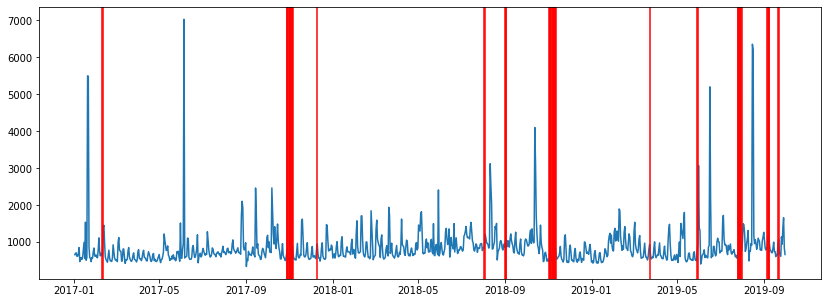

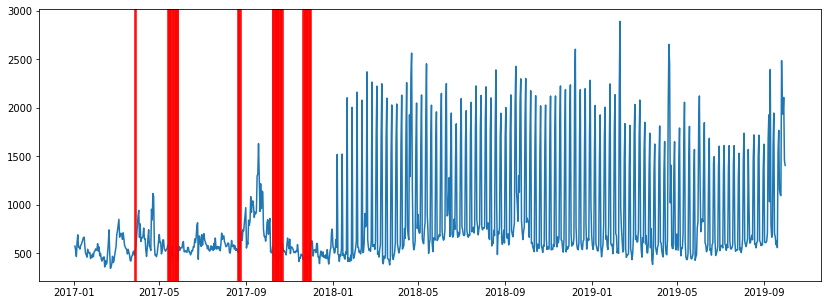

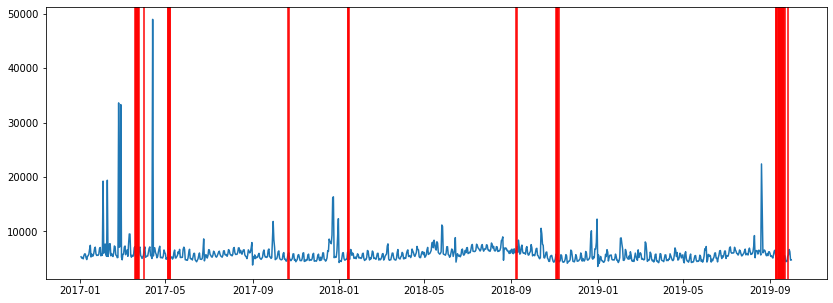

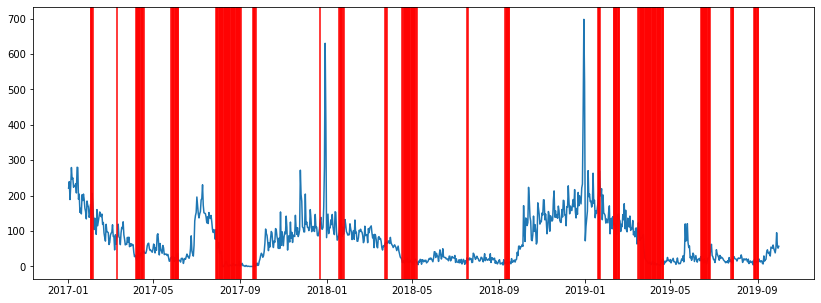

In [22]:
from kats.detectors.trend_mk import MKDetector

df_product_h1 = df_sales['hierarchy1_id'].drop_duplicates()
def trends_for_hierarchy(hierarchy: str) -> None:
    df_sales_h = df_sales.loc[df_sales['hierarchy1_id'] == hierarchy]
    df_sales_h = df_sales_h.groupby(by=['date'])['sales'].sum()

    df_sales_h = df_sales_h.loc['2017-01-01':'2019-10-01'].to_frame().reset_index()
    df_sales_h = df_sales_h.rename(columns={'date': 'time', 'sales': 'value'}, errors='raise')
    ts_sales_h = TimeSeriesData(time=df_sales_h.time, value=df_sales_h.value)

    detector = MKDetector(data=ts_sales_h, threshold=.8)

    detected_time_points = detector.detector(direction='down', window_size=21)

    detector.plot(detected_time_points)
    plt.show()


for hierarchy in df_product_h1:
    trends_for_hierarchy(hierarchy)
    

In [ ]:
## Trends for locations (cities)

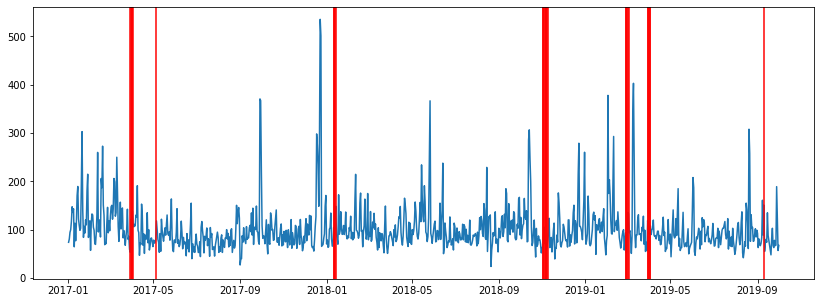

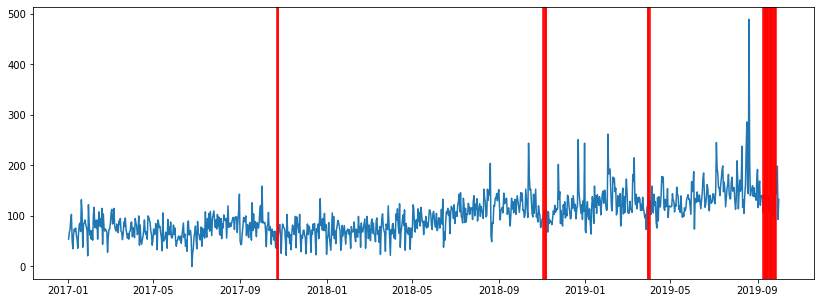

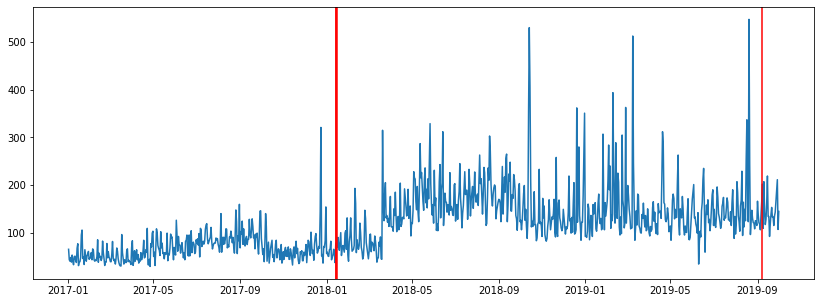

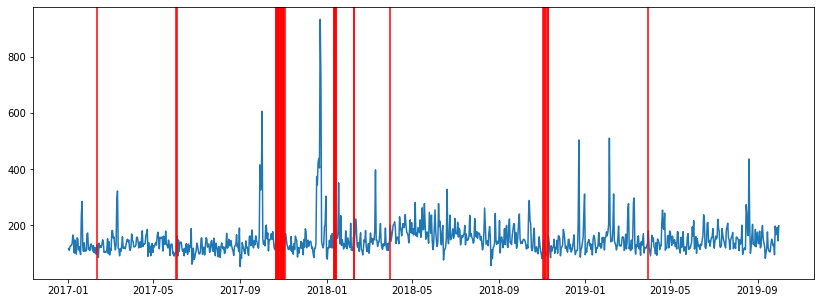

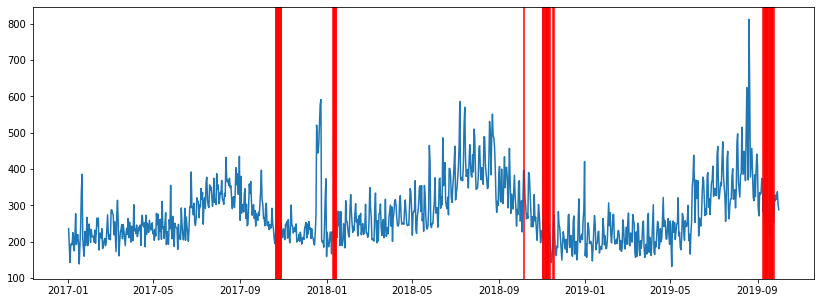

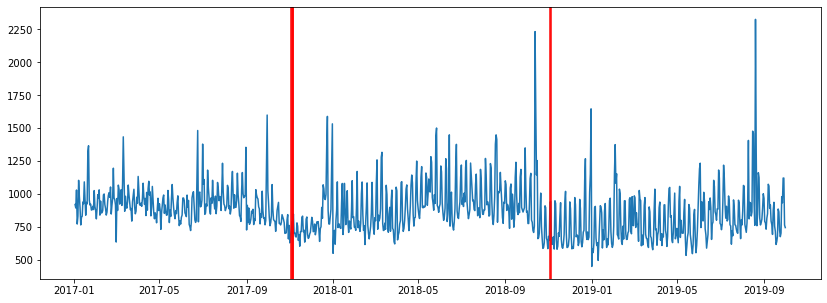

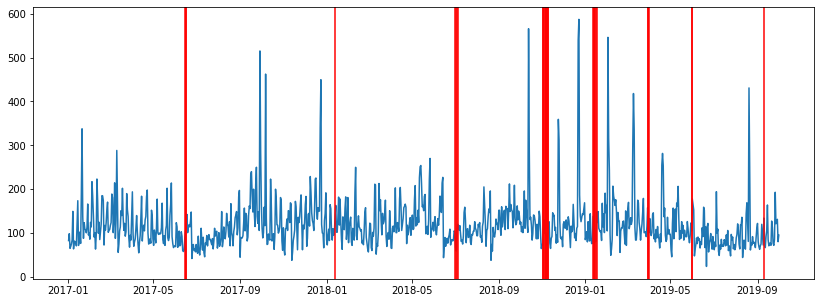

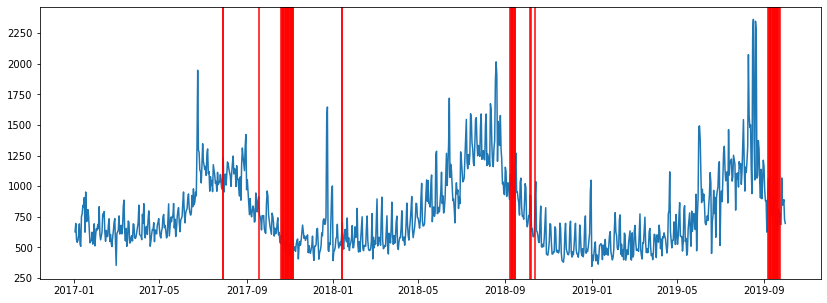

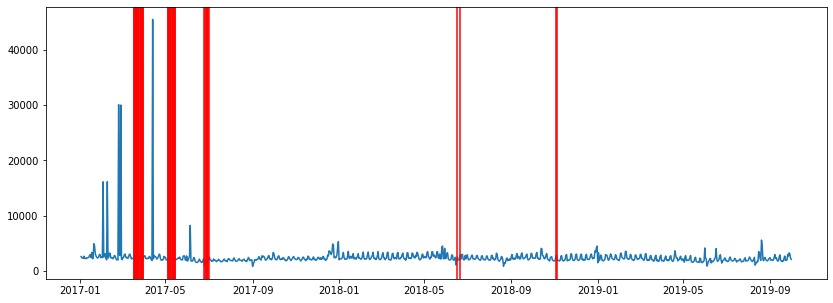

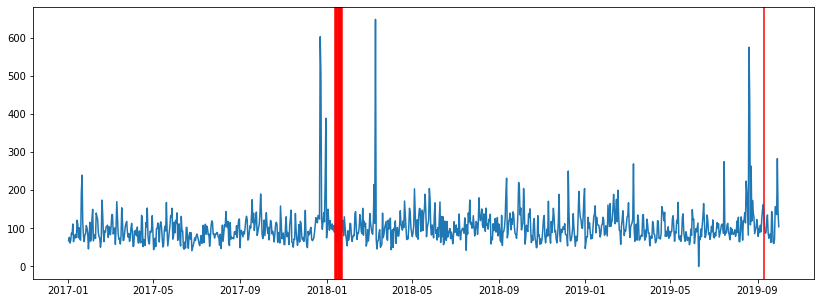

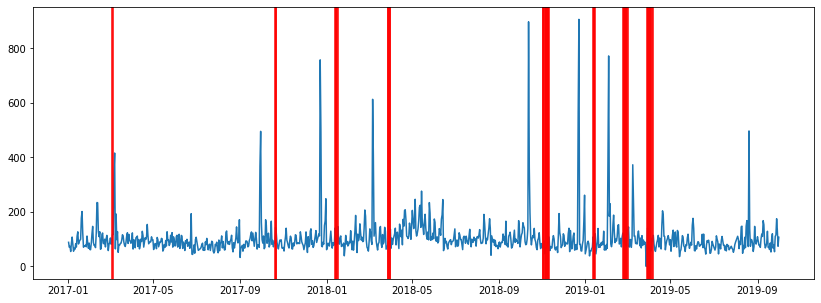

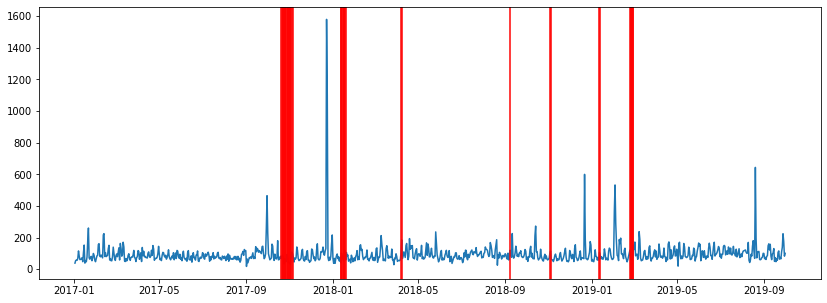

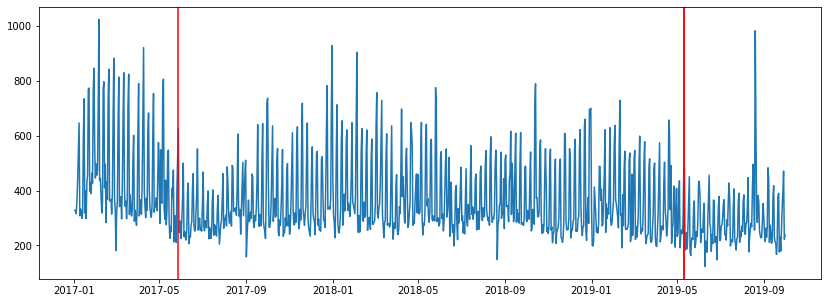

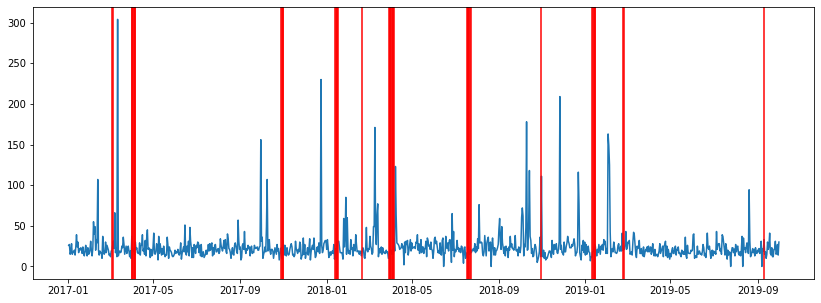

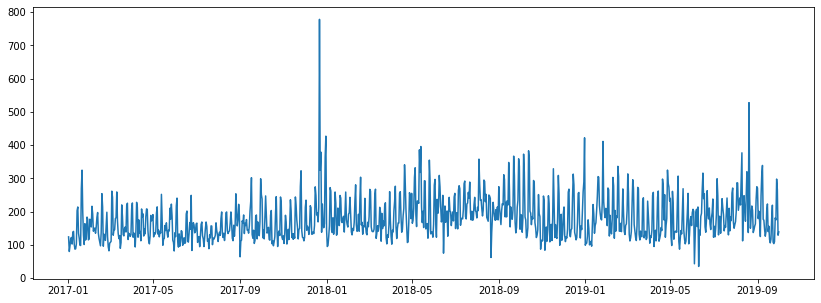

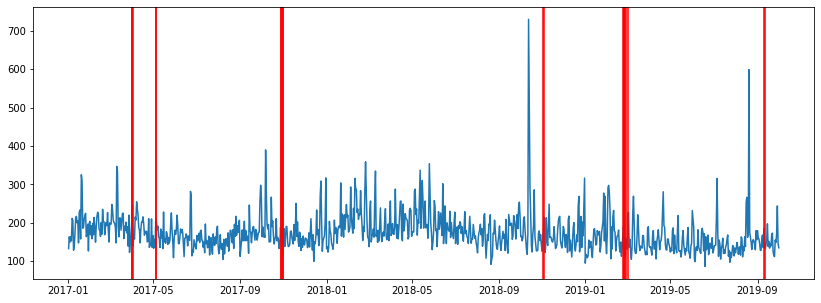

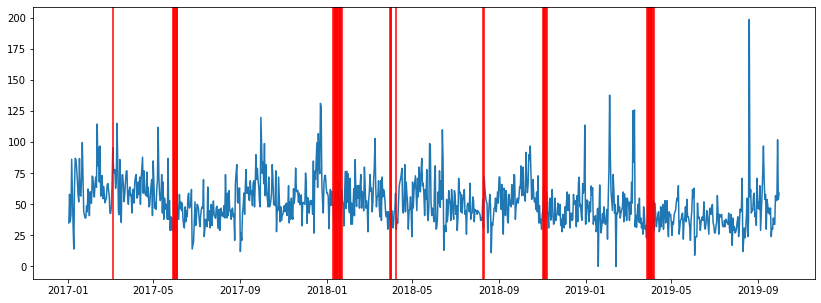

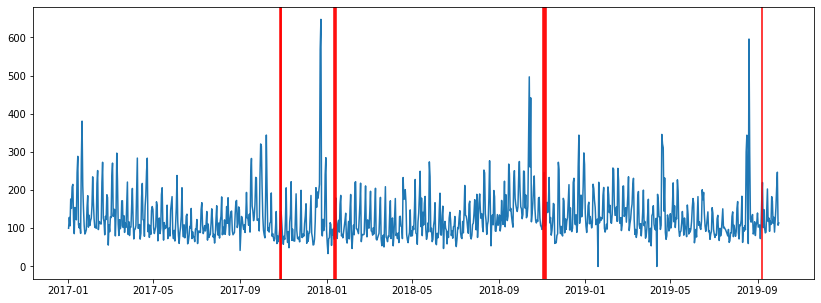

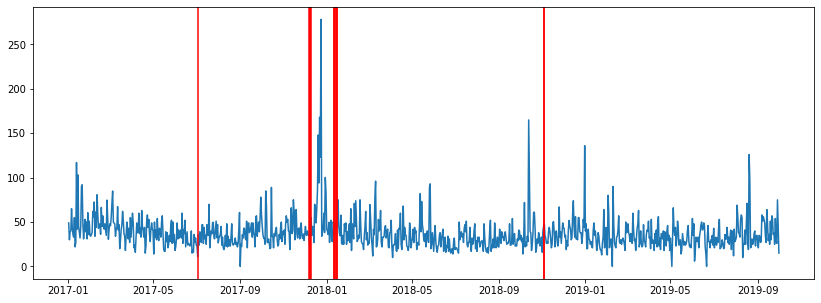

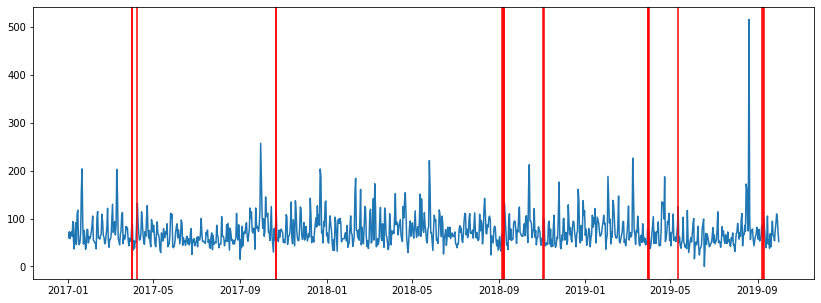

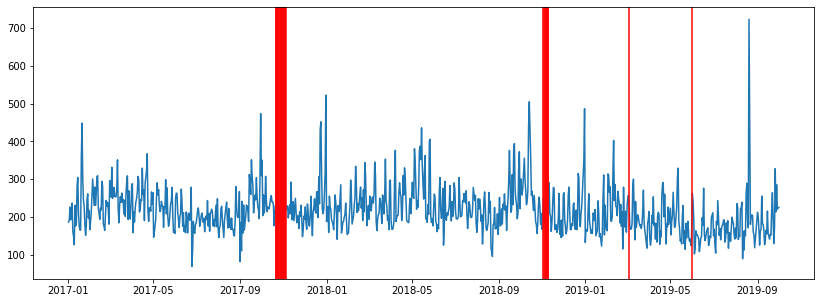

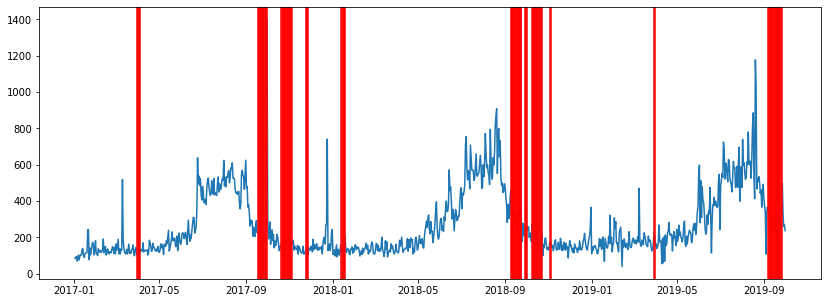

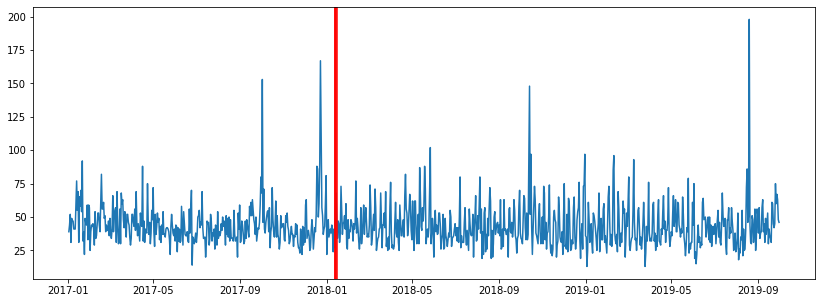

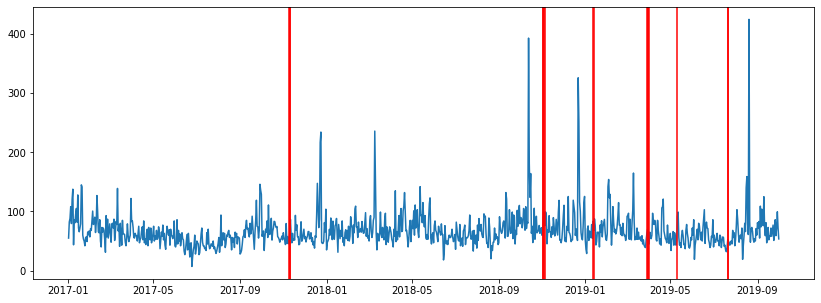

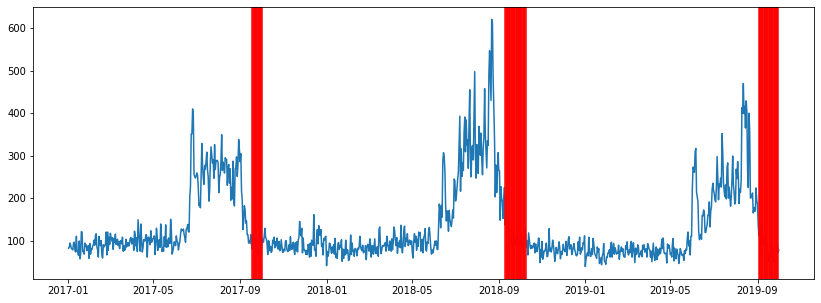

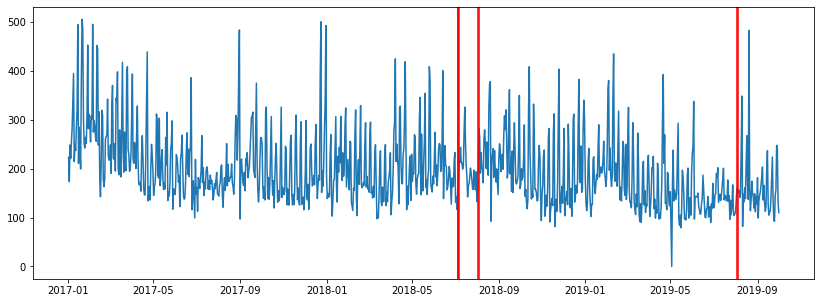

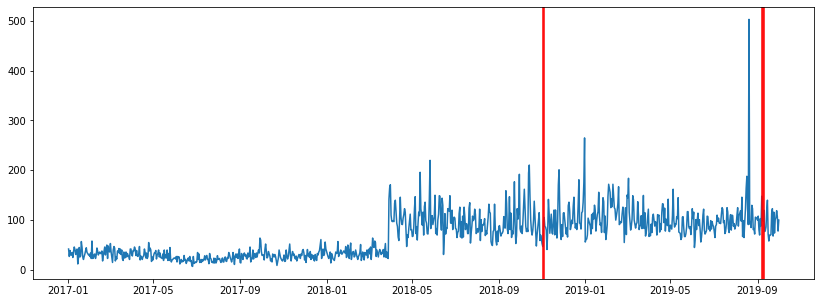

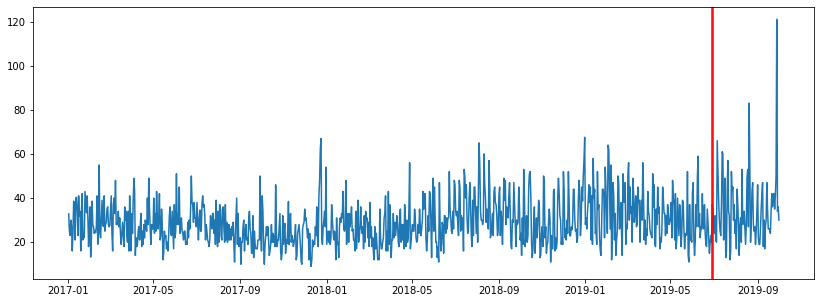

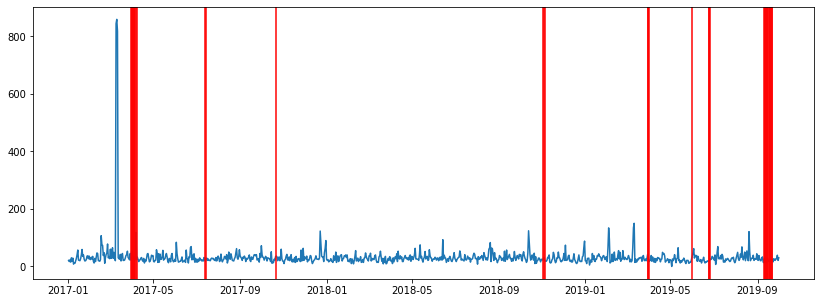

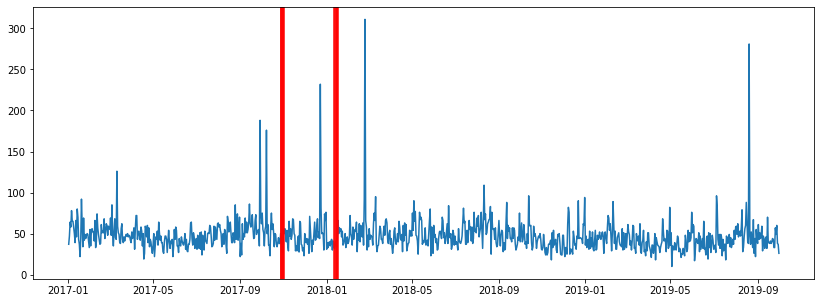

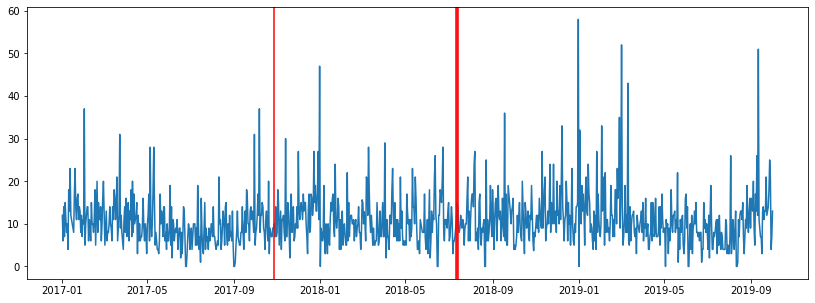

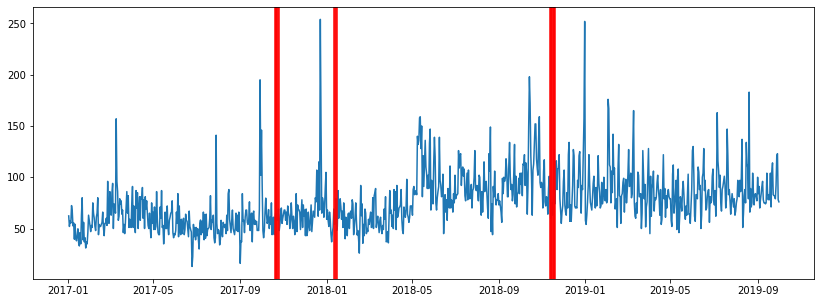

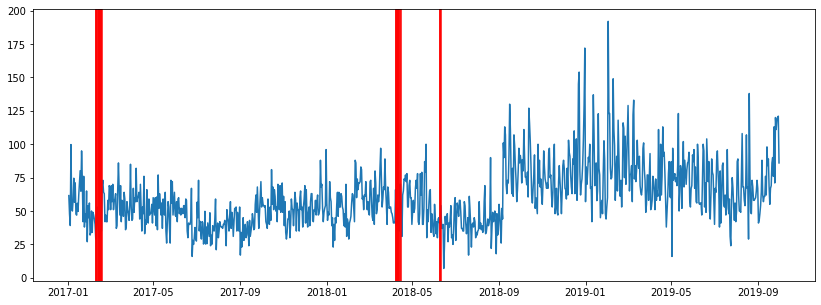

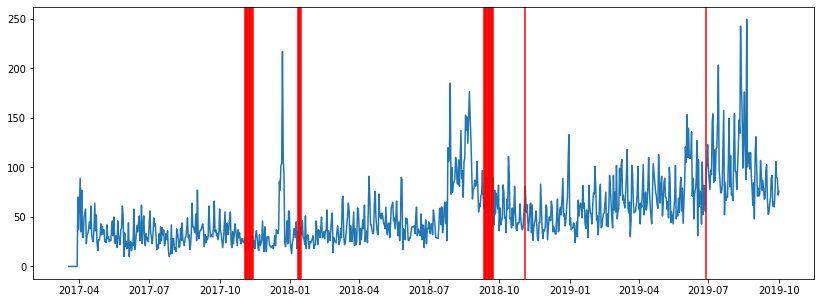

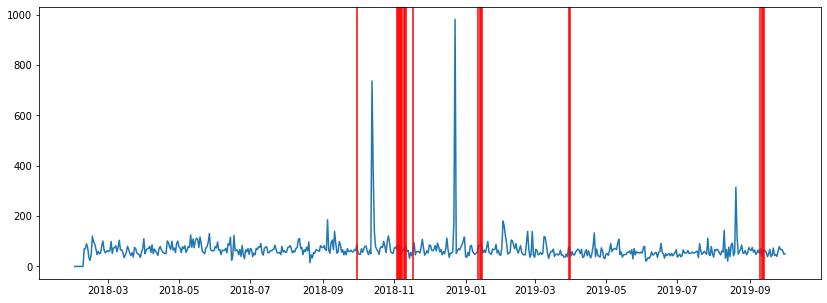

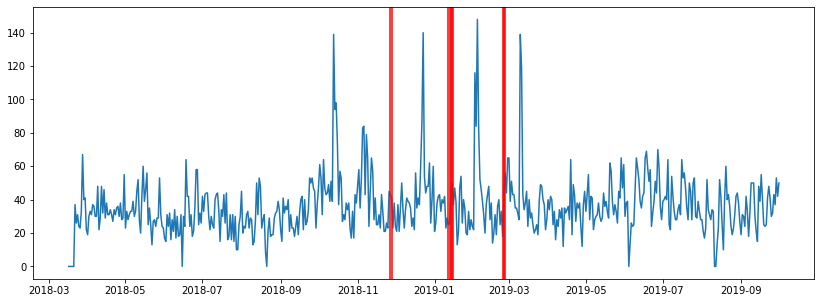

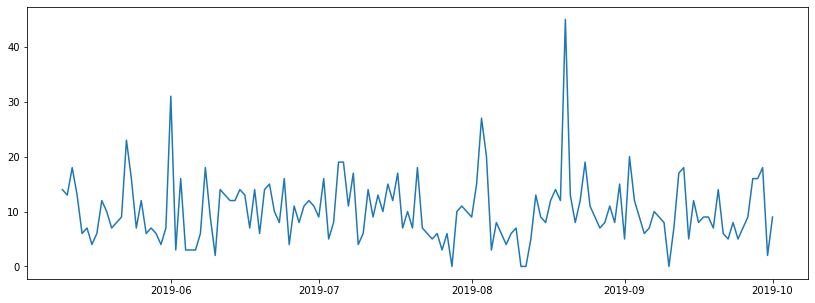

In [23]:
df_product_cities = df_sales['city_id'].drop_duplicates()
def trends_for_city(city: str) -> None:
    df_sales_c = df_sales.loc[df_sales['city_id'] == city]
    df_sales_c = df_sales_c.groupby(by=['date'])['sales'].sum()

    df_sales_c = df_sales_c.loc['2017-01-01':'2019-10-01'].to_frame().reset_index()
    df_sales_c = df_sales_c.rename(columns={'date': 'time', 'sales': 'value'}, errors='raise')
    ts_sales_c = TimeSeriesData(time=df_sales_c.time, value=df_sales_c.value)

    detector = MKDetector(data=ts_sales_c, threshold=.8)

    detected_time_points = detector.detector(direction='down', window_size=21)

    detector.plot(detected_time_points)
    plt.show()


for city in df_product_cities:
    trends_for_city(city)